![IronHack Logo](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/upload_d5c5793015fec3be28a63c4fa3dd4d55.png)

# Pipelines Project

## Octavio Garcia (W3)

Descripción del proyecto...

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fileName = "./datos.csv" 
df_original = pd.read_csv(fileName)
df_raw_raw = df_original.copy()
display(df_raw_raw.head())

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Análisis inicial de la calidad de los datos
Realizo análisis inicial para verificar que son datos que se pueden trabajar amablemente:

- Registros duplicados.
- Tipo de datos en cada columna.
- Análisis de nulos.

In [12]:
#Tipo de datos
display(df_raw_raw.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [13]:
#Análisis de duplicados
b = len(df_raw_raw)
df_raw = df_raw_raw.drop_duplicates()
a = len(df_raw)
print('Número de registros duplicados eliminados: ', str(b - a))

Número de registros duplicados eliminados:  0


In [14]:
#Análisis de nulos
null_col = df_raw.isnull().sum()
display(null_col)

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Limpieza de datos
Realizo limpieza de los datos:

- Elimino columna 'HDI for year' ya que contiene un 70% de valores nulos.
- Elimino columna 'country-year' ya que son datos redundantes. 
- Elimino columna 'gdp_for_year' ya que son datos tipo 'object' con los que no se puede trabajar numéricamente y con el gdp per capita se pueden proponer mejores hipótesis.

In [15]:
col_clean = ['country-year','HDI for year',' gdp_for_year ($) ']
df_clean = df_raw.drop(col_clean, axis=1)
display(df_clean.head())

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


### Hipótesis
Este  data set permite realizar varias propuestas de hipótesis al respecto del fenómeno de los suicidios en todo el mundo durante los últimos 30 años:

- Se pueden presentar gráficamente los ratios de suicidio ('suicides/100k pop') por diferentes criterios: país, género y rango de edad. 
- Se pueden generar 'bins' dentro de diferentes atributos y compararlos: zonas geográficas (e.g.: continentes), eṕocas (e.g.: 1985-1995, 1996-2009,...), generaciones, 
- Se pueden establecer relaciones con los valores numericos como la población o GDP per capita y buscar algún tipo de correlación.

### Data wrangling
Realizo varias acciones de transformación de los datos:

- Cambio la denominación de las columnas para mejor manejo y posterior presentación en informes.
- Analizo los datos en detalle para verificar que no haya inconsistencias antes de pla

In [16]:
#Renombro columnas para mejor manejo y posterior generación de informes.
df_w1 = df_clean.rename(index=str, columns={'country':'Country','year':'Year','sex':'Gender','age':'Ages',
                                            'suicides_no':'Suicides','population':'Population',
                                            'suicides/100k pop':'Suicidesx100k','gdp_per_capita ($)':'GDPxCapita',
                                            'generation':'Generation'})
display(df_w1.head())

,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [17]:
#Analizo los datos en busqueda de inconsistencias
atributes = ['Country','Year','Gender','Ages','Suicides','Population','Suicidesx100k','GDPxCapita','Generation']
#print(set(df_w1['Country']))
print('Country',len(set(df_w1['Country']))) 
print(set(df_w1['Year']))
print('Year',len(set(df_w1['Year']))) 
print(set(df_w1['Gender']))
print('Gender',len(set(df_w1['Gender']))) 
print(set(df_w1['Ages']))
print('Ages',len(set(df_w1['Ages']))) 
#print(set(df_w1['Suicides']))
print('Suicides',len(set(df_w1['Suicides']))) 
#print(set(df_w1['Population']))
print('Population',len(set(df_w1['Population']))) 
#print(set(df_w1['Suicidesx100k']))
print('Suicidesx100k',len(set(df_w1['Suicidesx100k']))) 
#print(set(df_w1['GDPxCapita']))
print('GDPxCapita',len(set(df_w1['GDPxCapita']))) 
print(set(df_w1['Generation']))
print('Generation',len(set(df_w1['Generation']))) 
display(df_w1.head())

Country 101
{1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016}
Year 32
{'male', 'female'}
Gender 2
{'75+ years', '15-24 years', '5-14 years', '25-34 years', '55-74 years', '35-54 years'}
Ages 6
Suicides 2084
Population 25564
Suicidesx100k 5298
GDPxCapita 2233
{'Boomers', 'Generation X', 'G.I. Generation', 'Millenials', 'Generation Z', 'Silent'}
Generation 6


,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [18]:
#Se detecta que la columna 'Generation' es inconsistente (no se corresponde adecuadamente con la columna 'Ages') 
#por lo que la eliminamos
col_inconsist = ['Generation']
df_w2 = df_w1.drop(col_inconsist, axis=1)
col_useless = ['Suicides','Population','GDPxCapita']
df_w3 = df_w2.drop(col_useless, axis=1)

rows = list(set(df_w3['Country']))

r_north = ['Iceland','Sweden','Norway','Finland','Denmark','Norway','Netherlands']
     
r_south = ['Spain','Greece','Italy','Portugal','France']

r_n_s = r_north+r_south

In [37]:
df_north = df_w3[df_w3['Country'].isin(r_north)]
display(df_north)
df_south = df_w3[df_w3['Country'].isin(r_south)]
display(df_south)
#df = df_w3[df_w3['Country'].isin(r_n_s)]
#df = pd.concat([df_north,df_south])
#display(df)

,Country,Year,Gender,Ages,Suicidesx100k
7418,Denmark,1994,male,75+ years,67.58
7419,Denmark,1994,male,55-74 years,42.17
7420,Denmark,1994,male,35-54 years,36.92
7421,Denmark,1994,female,75+ years,30.36
7422,Denmark,1994,male,25-34 years,20.53
7423,Denmark,1994,female,55-74 years,20.00
7424,Denmark,1994,female,35-54 years,15.44
7425,Denmark,1994,male,15-24 years,10.25
7426,Denmark,1994,female,25-34 years,5.86
7427,Denmark,1994,female,15-24 years,3.76


,Country,Year,Gender,Ages,Suicidesx100k
9086,France,1985,male,75+ years,120.49
9087,France,1985,male,55-74 years,52.84
9088,France,1985,male,35-54 years,40.47
9089,France,1985,male,25-34 years,35.19
9090,France,1985,female,75+ years,27.52
9091,France,1985,female,55-74 years,23.17
9092,France,1985,male,15-24 years,17.01
9093,France,1985,female,35-54 years,16.01
9094,France,1985,female,25-34 years,10.61
9095,France,1985,female,15-24 years,4.67


In [38]:
#Bins decades
decade_labels = ['1985-1995', '1996-2006', '2007-2016']
cutoffs = [1985,1996,2007,2016]
north_bins = pd.cut(df_north['Year'], cutoffs, labels=decade_labels)
south_bins = pd.cut(df_south['Year'], cutoffs, labels=decade_labels)

In [42]:
df_north['Decades'] = north_bins
df_dec_north = df_north.groupby(['Decades','Country']).sum().drop(['Year'], axis=1)
display(df_dec_north)
df_south['Decades'] = south_bins
df_dec_south = df_south.groupby(['Decades','Country']).sum().drop(['Year'], axis=1)
display(df_dec_south)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Suicidesx100k
Decades   Country                   
1985-1995 Denmark             721.91
          Finland            3476.27
          Iceland            1747.54
          Netherlands        1562.24
          Norway             1968.20
          Sweden             2107.91
1996-2006 Denmark            1918.73
          Finland            2858.05
          Iceland            1590.78
          Netherlands        1291.65
          Norway             1613.20
          Sweden             1791.92
2007-2016 Denmark            1081.01
          Finland            1589.79
          Iceland            1380.37
          Netherlands        1052.74
          Norway             1077.36
          Sweden             1347.89

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Suicidesx100k
Decades   Country                
1985-1995 France          3386.83
          Greece           588.66
          Italy           1321.90
          Portugal        1562.95
          Spain           1361.34
1996-2006 France          2641.85
          Greece           471.13
          Italy           1052.21
          Portugal         962.15
          Spain           1260.29
2007-2016 France          1425.67
          Greece           394.16
          Italy            661.36
          Portugal         983.44
          Spain            772.50

In [50]:
df_eu_north = df_dec_north.groupby("Decades").agg({"Suicidesx100k":"mean"})
display(df_eu_north)
df_eu_south = df_dec_south.groupby("Decades").agg({"Suicidesx100k":"mean"})
display(df_eu_south)

,Suicidesx100k
Decades,
1985-1995,1930.678333
1996-2006,1844.055000
2007-2016,1254.860000


,Suicidesx100k
Decades,
1985-1995,1644.336
1996-2006,1277.526
2007-2016,847.426


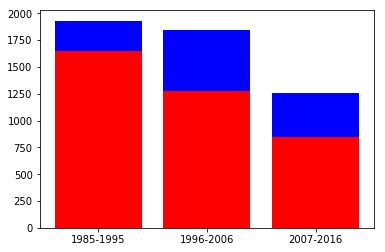

In [52]:
height = list(df_eu_north["Suicidesx100k"])
bars = tuple(df_eu_north.index)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue'])
plt.xticks(y_pos, bars)
plt.savefig("North", bbox_inches='tight')

height = list(df_eu_south["Suicidesx100k"])
bars = tuple(df_eu_south.index)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['red'])
plt.xticks(y_pos, bars)
plt.savefig("South", bbox_inches='tight')

### IDEAS

In [1]:
#Statistics
#stats = df_w2.describe().transpose()
#display(stats.head())

In [13]:
#Pivot table
table_country = pd.pivot_table(df_w2, values='Suicides', index=['Country'], columns=['Ages'],aggfunc=np.sum)
display(table_country.head())

Ages,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
Country,,,,,,
Albania,546.0,427.0,591.0,61.0,264.0,81.0
Antigua and Barbuda,0.0,1.0,6.0,0.0,4.0,0.0
Argentina,17655.0,13490.0,21781.0,1452.0,19862.0,7979.0
Armenia,175.0,290.0,649.0,24.0,574.0,193.0
Aruba,7.0,24.0,42.0,0.0,22.0,6.0


In [31]:
#Reporte de datos de Sx100k 
col_country = ['Year','Population','Suicides','GDPxCapita']
df_w3 = df_w2.drop(col_country, axis=1)
df_country = df_w3.groupby(['Country','Ages']).sum()
display(df_country.sort_values(by=['Country','Ages'], ascending=False).head())

Suicidesx100k
Country    Ages                      
Uzbekistan 75+ years           377.46
           55-74 years         416.46
           5-14 years           47.45
           35-54 years         484.06
           25-34 years         436.28

In [88]:
#df_country es el data frame de partida ordenado por paises.
df_n_s = df.groupby(['Country','Ages']).sum()
df_n_s.sort_values(by=['Country'], ascending=False).head(100)

Year  Suicidesx100k
Country     Ages                              
Sweden      75+ years    120090        1533.84
            55-74 years  120090        1170.17
            5-14 years   116058          24.30
            35-54 years  120090        1108.39
            25-34 years  120090         822.85
            15-24 years  120090         588.17
Spain       75+ years    124000        1546.95
            55-74 years  124000         766.77
            5-14 years   124000          14.11
            35-54 years  124000         521.09
            25-34 years  124000         404.30
            15-24 years  124000         255.84
Portugal    5-14 years   107940          12.52
            15-24 years  107940         201.03
            25-34 years  107940         353.73
            35-54 years  107940         485.88
            55-74 years  107940         827.26
            75+ years    107940        1792.94
Norway      75+ years    120030         948.49
            55-74 years  120030         992.63
            5-14 years   120030          44.47
            35-54 years  120030         979.58
            25-34 years  120030         906.60
            15-24 years  120030         786.99
Netherlands 75+ years    128032        1209.09
            55-74 years  128032         903.64
            5-14 years   124000          19.49
            35-54 years  128032         888.11
            25-34 years  128032         662.15
            15-24 years  128032         384.04
...                         ...            ...
Iceland     15-24 years  128032         890.05
            75+ years    128032         779.20
            55-74 years  128032        1178.23
            5-14 years   124000          27.76
            35-54 years  128032         998.95
            25-34 years  128032        1015.55
Greece      5-14 years   124000           6.40
            15-24 years  124000         140.24
            35-54 years  124000         271.28
            25-34 years  124000         243.65
            55-74 years  124000         333.07
            75+ years    124000         517.48
France      15-24 years  119970         488.96
            35-54 years  119970        1548.74
            25-34 years  119970        1020.98
            75+ years    119970        3128.56
            5-14 years   119970          23.16
            55-74 years  119970        1592.85
Finland     75+ years    116058        1693.06
            55-74 years  116058        1614.24
            5-14 years   116058          30.08
            35-54 years  116058        1858.51
            25-34 years  116058        1573.30
            15-24 years  116058        1154.92
Denmark     5-14 years    88198          11.82
            35-54 years   88198         740.16
            25-34 years   88198         427.21
            55-74 years   88198         856.46
            75+ years     88198        1420.97
            15-24 years   88198         265.03

[66 rows x 2 columns]